In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.tree import plot_tree


In [ ]:
file_path = 'AfSmote_Data.csv'
data = pd.read_csv(file_path)

data.head()


,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,3,2,39,5,1,3,12691.0,777,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,2,4,44,6,1,2,8256.0,864,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,51,3,2,3,36,4,1,0,3418.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,40,3,5,2,21,5,1,0,4716.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


Feature: Customer_Age, Score: 0.02034
Feature: Dependent_count, Score: 0.00729
Feature: Education_Level, Score: 0.00740
Feature: Income_Category, Score: 0.00653
Feature: Months_on_book, Score: 0.01421
Feature: Total_Relationship_Count, Score: 0.05599
Feature: Months_Inactive_12_mon, Score: 0.01201
Feature: Contacts_Count_12_mon, Score: 0.00984
Feature: Credit_Limit, Score: 0.02200
Feature: Total_Revolving_Bal, Score: 0.09314
Feature: Avg_Open_To_Buy, Score: 0.02543
Feature: Total_Amt_Chng_Q4_Q1, Score: 0.04919
Feature: Total_Trans_Amt, Score: 0.21299
Feature: Total_Trans_Ct, Score: 0.19149
Feature: Total_Ct_Chng_Q4_Q1, Score: 0.08139
Feature: Avg_Utilization_Ratio, Score: 0.05439
Feature: Gender_F, Score: 0.02932
Feature: Gender_M, Score: 0.03477
Feature: Marital_Status_Divorced, Score: 0.00415
Feature: Marital_Status_Married, Score: 0.03281
Feature: Marital_Status_Single, Score: 0.02803
Feature: Card_Category_Blue, Score: 0.00346
Feature: Card_Category_Gold, Score: 0.00110
Feature: Ca

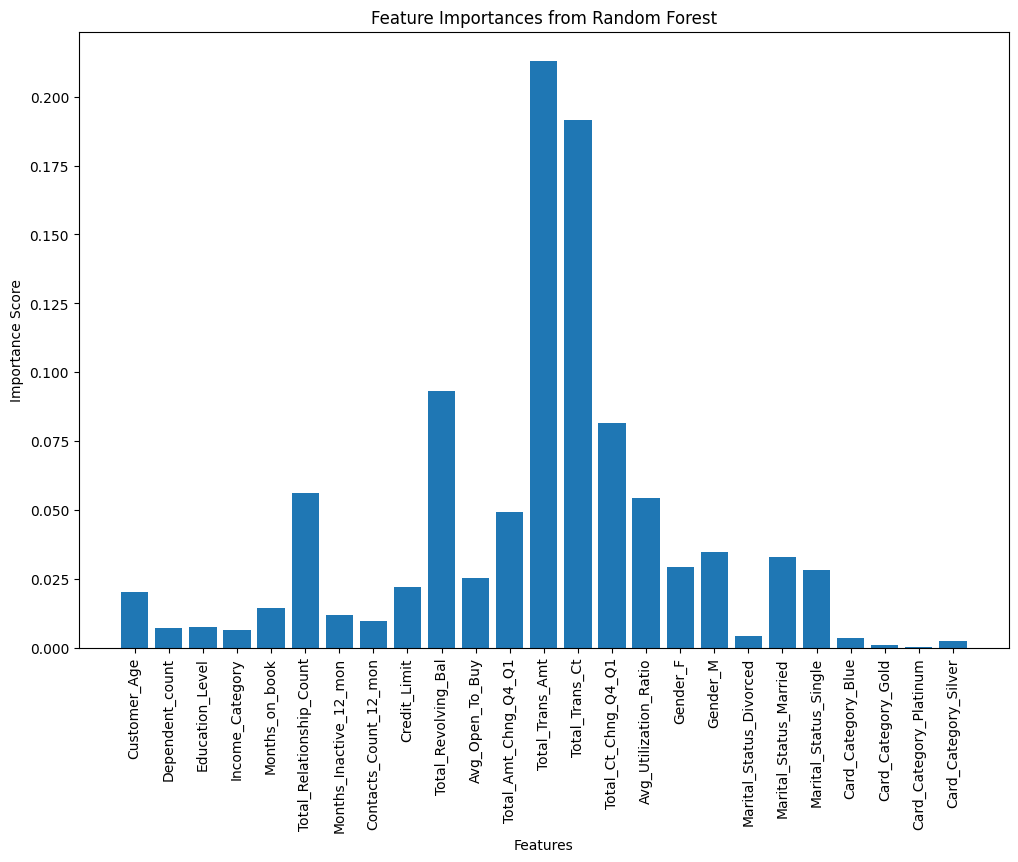

In [ ]:
# Separating the features and the target variable
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Initialize and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Getting feature importances and feature names
importances = model.feature_importances_
feature_names = X.columns

# Print feature importance
for i in range(len(importances)):
    print(f'Feature: {feature_names[i]}, Score: {importances[i]:.5f}')

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Sorted Feature Importances:")
feature_importances


Sorted Feature Importances:


Total_Trans_Amt             0.212988
Total_Trans_Ct              0.191490
Total_Revolving_Bal         0.093143
Total_Ct_Chng_Q4_Q1         0.081394
Total_Relationship_Count    0.055992
Avg_Utilization_Ratio       0.054391
Total_Amt_Chng_Q4_Q1        0.049194
Gender_M                    0.034769
Marital_Status_Married      0.032812
Gender_F                    0.029322
Marital_Status_Single       0.028031
Avg_Open_To_Buy             0.025428
Credit_Limit                0.021996
Customer_Age                0.020336
Months_on_book              0.014209
Months_Inactive_12_mon      0.012008
Contacts_Count_12_mon       0.009836
Education_Level             0.007398
Dependent_count             0.007285
Income_Category             0.006527
Marital_Status_Divorced     0.004145
Card_Category_Blue          0.003459
Card_Category_Silver        0.002489
Card_Category_Gold          0.001097
Card_Category_Platinum      0.000262
dtype: float64

In [ ]:
# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=100)

# Initialize RFE with the Logistic Regression model
rfe = RFE(estimator=model_lr, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X, y)  # Using the full dataset for RFE
feature_names_rfe = X.columns  # Getting the feature names

# Print the results of RFE feature selection
rfe_results = [(feature_names_rfe[i], rfe.support_[i], rfe.ranking_[i]) for i in range(len(rfe.support_))]
rfe_results_df = pd.DataFrame(rfe_results, columns=['Feature', 'Selected', 'Rank'])

rfe_results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Feature,Selected,Rank
0,Customer_Age,False,5
1,Dependent_count,False,2
2,Education_Level,False,7
3,Income_Category,False,4
4,Months_on_book,False,9
5,Total_Relationship_Count,True,1
6,Months_Inactive_12_mon,True,1
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
9,Total_Revolving_Bal,True,1


In [ ]:
rfe_results_sorted_df = rfe_results_df.sort_values(by='Rank')

# Display the sorted RFE results
rfe_results_sorted_df


,Feature,Selected,Rank
9,Total_Revolving_Bal,True,1
16,Gender_F,True,1
20,Marital_Status_Single,True,1
5,Total_Relationship_Count,True,1
6,Months_Inactive_12_mon,True,1
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
14,Total_Ct_Chng_Q4_Q1,True,1
10,Avg_Open_To_Buy,True,1
21,Card_Category_Blue,True,1


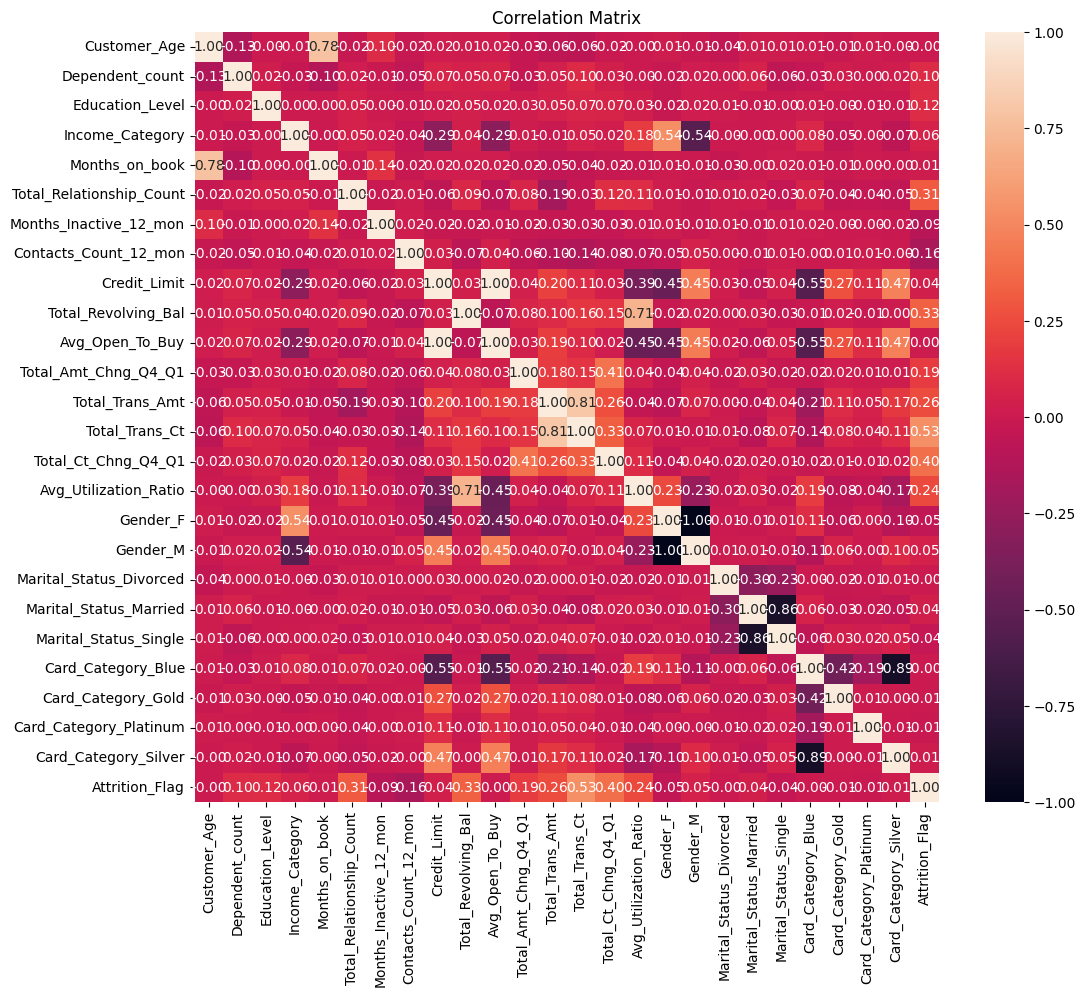

Attrition_Flag              1.000000
Total_Trans_Ct              0.534760
Total_Ct_Chng_Q4_Q1         0.398297
Total_Revolving_Bal         0.334176
Total_Relationship_Count    0.308418
Total_Trans_Amt             0.255231
Avg_Utilization_Ratio       0.240270
Total_Amt_Chng_Q4_Q1        0.185172
Education_Level             0.115485
Dependent_count             0.104803
Income_Category             0.057281
Gender_M                    0.054468
Marital_Status_Married      0.036806
Credit_Limit                0.035888
Card_Category_Silver        0.011182
Months_on_book              0.008830
Avg_Open_To_Buy             0.003008
Marital_Status_Divorced    -0.000196
Customer_Age               -0.002969
Card_Category_Blue         -0.004824
Card_Category_Gold         -0.005416
Card_Category_Platinum     -0.014942
Marital_Status_Single      -0.037388
Gender_F                   -0.054468
Months_Inactive_12_mon     -0.088356
Contacts_Count_12_mon      -0.156190
Name: Attrition_Flag, dtype: float64

In [ ]:
# calculating the correlation matrix
corr_matrix = data.corr()

# visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# printing the sorted correlation values for 'Attrition Flag'
sorted_corr_attrition_flag = corr_matrix['Attrition_Flag'].sort_values(ascending=False)
sorted_corr_attrition_flag

In [ ]:
# Creating the specified feature sets and including the target variable
set1_features = ['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count']
set2_features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
                 'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
                 'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue',
                 'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt']
target = 'Attrition_Flag'

set1_data = data[set1_features + [target]]
set2_data = data[set2_features + [target]]


set1_data_head = set1_data.head()
set2_data_head = set2_data.head()

set1_data_head

,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Attrition_Flag
0,777,1.625,5,1
1,864,3.714,6,1
2,0,2.333,4,1
3,2517,2.333,3,1
4,0,2.500,5,1


In [ ]:
set2_data_head

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Attrition_Flag
0,42,777,1.625,5,0.061,1.335,12691.0,0.0,2,1.0,11914.0,1,3,1144,1
1,33,864,3.714,6,0.105,1.541,8256.0,1.0,4,1.0,7392.0,1,2,1291,1
2,20,0,2.333,4,0.000,2.594,3418.0,0.0,3,1.0,3418.0,1,0,1887,1
3,20,2517,2.333,3,0.760,1.405,3313.0,1.0,4,1.0,796.0,4,1,1171,1
4,28,0,2.500,5,0.000,2.175,4716.0,0.0,2,1.0,4716.0,1,0,816,1


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting set1_data
X_set1 = set1_data.drop('Attrition_Flag', axis=1)
y_set1 = set1_data['Attrition_Flag']
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = train_test_split(X_set1, y_set1, test_size=0.2, random_state=42)

# Splitting set2_data
X_set2 = set2_data.drop('Attrition_Flag', axis=1)
y_set2 = set2_data['Attrition_Flag']
X_train_set2, X_test_set2, y_train_set2, y_test_set2 = train_test_split(X_set2, y_set2, test_size=0.2, random_state=42)


In [ ]:
X_train_set2

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt
4679,70,0,0.458000,4,0.000000,0.826000,1438.300000,1.0,4,1.000000,1438.300000,3,1,4242
2512,69,0,0.917000,5,0.000000,0.766000,32096.000000,0.0,3,1.000000,32096.000000,2,4,2619
993,26,510,0.529000,5,0.050000,0.344000,10239.000000,0.0,2,1.000000,9729.000000,1,2,1228
1327,42,1252,1.100000,4,0.743000,0.575000,1686.000000,0.0,2,1.000000,434.000000,5,4,1758
4630,68,1501,1.194000,3,0.532000,1.043000,2822.000000,0.0,1,1.000000,1321.000000,3,2,4344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,74,0,0.981950,2,0.000000,0.952144,4425.182900,0.0,1,1.000000,4425.182900,2,3,8742
11964,53,364,0.575194,3,0.150519,0.883449,2422.588348,1.0,4,1.000000,2058.261665,3,2,2529
5390,74,1547,1.000000,3,0.669000,0.804000,2314.000000,1.0,4,1.000000,767.000000,1,2,4678
860,42,1707,0.312000,4,0.479000,0.506000,3563.000000,0.0,1,1.000000,1856.000000,1,1,1482


In [ ]:
X_test_set2

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt
10941,44,793,0.625091,6,0.060033,0.410455,13190.818359,0.971292,3,0.028708,12397.014810,2,3,1931
5250,70,1420,0.591000,6,0.645000,0.762000,2201.000000,1.000000,4,1.000000,781.000000,6,1,4256
10292,24,1313,0.559980,4,0.093349,0.656196,14067.322904,0.000000,2,1.000000,12753.681717,3,3,1076
2266,68,1712,0.659000,5,0.196000,0.895000,8744.000000,0.000000,4,1.000000,7032.000000,2,0,2579
6398,70,0,0.667000,4,0.000000,0.709000,1438.300000,1.000000,4,1.000000,1438.300000,2,3,4323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,67,0,0.634000,3,0.000000,0.649000,33371.000000,1.000000,4,0.000000,33371.000000,1,4,3638
8404,93,2426,0.788000,1,0.300000,0.720000,8074.000000,1.000000,4,1.000000,5648.000000,2,2,5372
11114,51,1863,0.504448,1,0.220700,1.037802,8434.042714,0.675119,3,1.000000,6570.087101,4,2,4911
7877,70,2015,1.000000,1,0.339000,0.815000,5945.000000,0.000000,2,1.000000,3930.000000,2,2,3645


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Training on Set 1
model_set1 = MultinomialNB()
model_set1.fit(X_train_set1, y_train_set1)

# Training on Set 2
model_set2 = MultinomialNB()
model_set2.fit(X_train_set2, y_train_set2)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluation on Set 1
y_pred_set1 = model_set1.predict(X_test_set1)
print("Accuracy Set 1:", accuracy_score(y_test_set1, y_pred_set1))
print(classification_report(y_test_set1, y_pred_set1))

# Evaluation on Set 2
y_pred_set2 = model_set2.predict(X_test_set2)
print("Accuracy Set 2:", accuracy_score(y_test_set2, y_pred_set2))
print(classification_report(y_test_set2, y_pred_set2))


Accuracy Set 1: 0.6358823529411765
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1724
           1       0.63      0.62      0.63      1676

    accuracy                           0.64      3400
   macro avg       0.64      0.64      0.64      3400
weighted avg       0.64      0.64      0.64      3400

Accuracy Set 2: 0.558235294117647
              precision    recall  f1-score   support

           0       0.59      0.41      0.48      1724
           1       0.54      0.71      0.61      1676

    accuracy                           0.56      3400
   macro avg       0.57      0.56      0.55      3400
weighted avg       0.57      0.56      0.55      3400



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Calculating the metrics for Set 1
metrics_set1 = {
    'Accuracy': accuracy_score(y_test_set1, y_pred_set1),
    'Precision': precision_score(y_test_set1, y_pred_set1),
    'Recall': recall_score(y_test_set1, y_pred_set1),
    'F1 Score': f1_score(y_test_set1, y_pred_set1),
    'ROC AUC Score': roc_auc_score(y_test_set1, y_pred_set1)
}

# Calculating the metrics for Set 2
metrics_set2 = {
    'Accuracy': accuracy_score(y_test_set2, y_pred_set2),
    'Precision': precision_score(y_test_set2, y_pred_set2),
    'Recall': recall_score(y_test_set2, y_pred_set2),
    'F1 Score': f1_score(y_test_set2, y_pred_set2),
    'ROC AUC Score': roc_auc_score(y_test_set2, y_pred_set2)
}

metrics_set1, metrics_set2


({'Accuracy': 0.6358823529411765,
  'Precision': 0.6328883495145631,
  'Recall': 0.6223150357995226,
  'F1 Score': 0.6275571600481348,
  'ROC AUC Score': 0.6356934807767913},
 {'Accuracy': 0.558235294117647,
  'Precision': 0.5392953929539296,
  'Recall': 0.7124105011933174,
  'F1 Score': 0.6138817480719795,
  'ROC AUC Score': 0.5603815847033872})

In [ ]:
# Obtain probability scores for Set 1 and Set 2
y_scores_set1 = model_set1.predict_proba(X_test_set1)[:, 1]
y_scores_set2 = model_set2.predict_proba(X_test_set2)[:, 1]


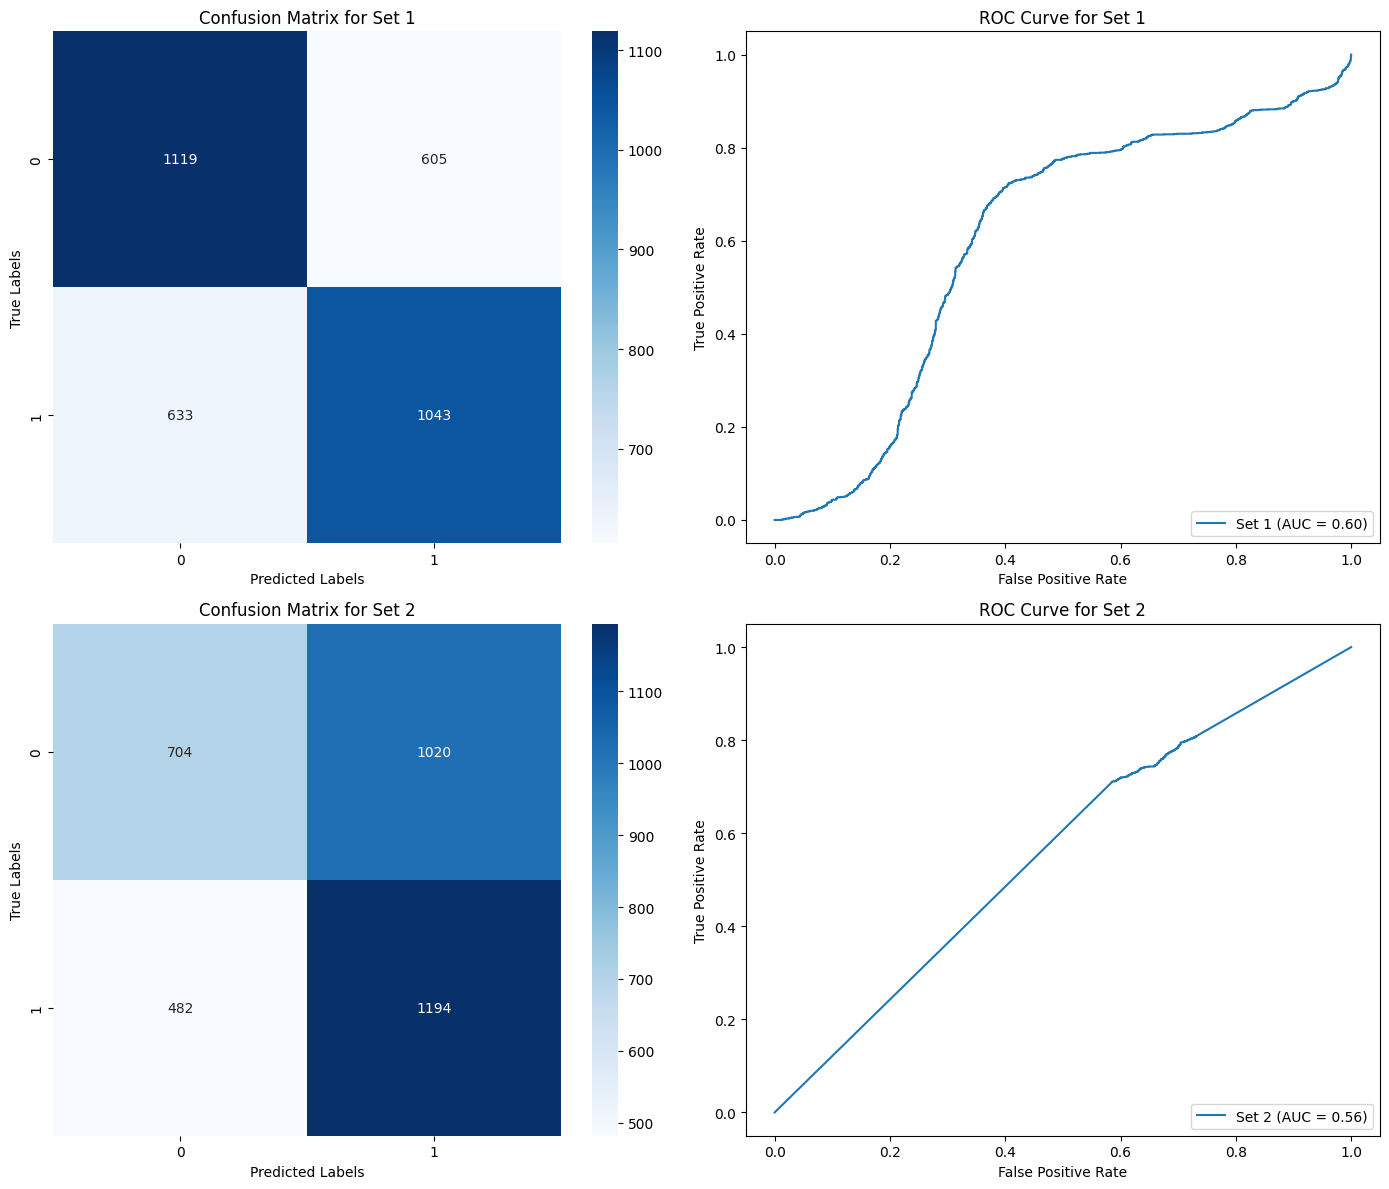

In [ ]:
# Calculate confusion matrices
conf_matrix_set1 = confusion_matrix(y_test_set1, y_pred_set1)
conf_matrix_set2 = confusion_matrix(y_test_set2, y_pred_set2)

# Calculate ROC curve and AUC for Set 1
fpr_set1, tpr_set1, thresholds_set1 = roc_curve(y_test_set1, y_scores_set1)
roc_auc_set1 = auc(fpr_set1, tpr_set1)

# Calculate ROC curve and AUC for Set 2
fpr_set2, tpr_set2, thresholds_set2 = roc_curve(y_test_set2, y_scores_set2)
roc_auc_set2 = auc(fpr_set2, tpr_set2)

# Plotting the confusion matrices and ROC curves
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Set 1 Confusion Matrix
sns.heatmap(conf_matrix_set1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Set 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

# Set 1 ROC Curve
RocCurveDisplay(fpr=fpr_set1, tpr=tpr_set1, roc_auc=roc_auc_set1, estimator_name='Set 1').plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Set 1')

# Set 2 Confusion Matrix
sns.heatmap(conf_matrix_set2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Set 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

# Set 2 ROC Curve
RocCurveDisplay(fpr=fpr_set2, tpr=tpr_set2, roc_auc=roc_auc_set2, estimator_name='Set 2').plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Set 2')

plt.tight_layout()
plt.show()
